In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from vocalseg.examples import mocking
from vocalseg.utils import butter_bandpass_filter, spectrogram, int16tofloat32, plot_spec

In [3]:
# load data
rate, data = mocking()
# filter data
data = butter_bandpass_filter(int16tofloat32(data), 500, 20000, rate)

In [4]:
figsize = (20,3)

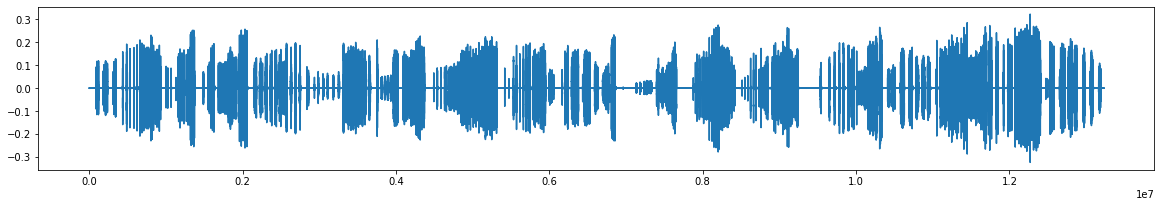

In [5]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(data)

### Generate spectrogram

In [6]:
### parameters
n_fft=4096
hop_length_ms=1
win_length_ms=4
ref_level_db=20
pre=0.97
min_level_db=-70
silence_threshold = 0.01
min_silence_for_spec=0.1
max_vocal_for_spec=1.0,
min_syllable_length_s = 0.01
spectral_range = [500, 20000]

In [7]:
spec = spectrogram(
    data,
    rate,
    n_fft=n_fft,
    hop_length_ms=hop_length_ms,
    win_length_ms=win_length_ms,
    ref_level_db=ref_level_db,
    pre=pre,
    min_level_db=min_level_db,
)
np.shape(spec)

(2049, 300682)

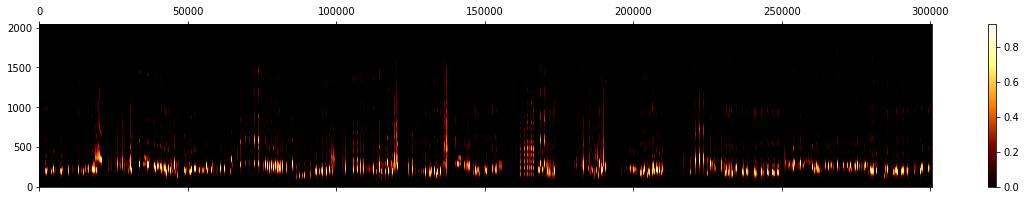

In [8]:
fig, ax = plt.subplots(figsize=figsize)
plot_spec(spec, fig, ax);

### generate spectrogram using dynamic thresholding

In [9]:
from vocalseg.dynamic_thresholding import dynamic_threshold_segmentation

In [18]:
results = dynamic_threshold_segmentation(
    data,
    rate,
    n_fft=n_fft,
    hop_length_ms=hop_length_ms,
    win_length_ms=win_length_ms,
    ref_level_db=ref_level_db,
    pre=pre,
    min_level_db=min_level_db,
    silence_threshold = silence_threshold,
    verbose=True,
    spectral_range = spectral_range,
    min_syllable_length_s = min_syllable_length_s
    
)
#print(len(results['onsets']))

 17%|█▋        | 1/6 [00:14<01:14, 14.86s/it]

longest silence 4.970702947845808
longest vocalization 2.7517460317460305
Current min_level_db: -70


 33%|███▎      | 2/6 [00:29<00:59, 14.85s/it]

longest silence 6.372517006802724
longest vocalization 1.2990476190476272
Current min_level_db: -65


 50%|█████     | 3/6 [00:44<00:44, 14.89s/it]

longest silence 6.389478458049894
longest vocalization 1.2202267573696162
Current min_level_db: -60


longest silence 6.464308390022694
longest vocalization 0.8869841269841174


In [20]:
figsize = (100, 4)

In [21]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

In [36]:
hop_len_ms = hop_length_ms 

In [42]:
rate / int(hop_len_ms / 1000 * rate) / 1000

1.0022727272727272

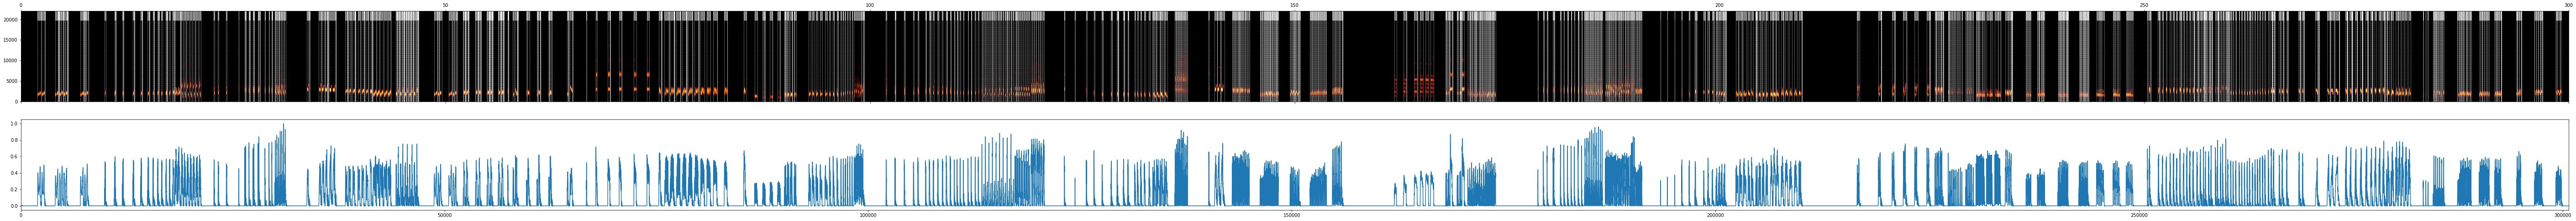

In [45]:
fig, axs = plt.subplots(nrows = 2, figsize=(figsize[0], figsize[1]*2))
plot_spec(results['spec'], fig, axs[0], rate = rate, hop_len_ms= hop_length_ms, show_cbar=False);
axs[1].plot(results['vocal_envelope'])
#axs[1].plot(results['vocal_envelope'] > silence_threshold)
axs[1].set_xlim([0, len(results['vocal_envelope'])])

ylmin, ylmax = (axs[0].get_ylim())
ysize = (ylmax - ylmin)*.1
ymin = ylmax- ysize

patches = []
for onset, offset in zip(results['onsets'], results['offsets']):
    axs[0].axvline(onset, color = '#FFFFFF', ls="dashed", lw=0.5)
    axs[0].axvline(offset, color = '#FFFFFF', ls="dashed", lw=0.5)
    patches.append(Rectangle(xy=(onset, ymin), width = offset-onset, height = ysize))

collection = PatchCollection(patches, color='white', alpha=0.5)
axs[0].add_collection(collection);

In [30]:
(np.shape(results['spec'])[1] * hop_length_ms) / 1000

300.682

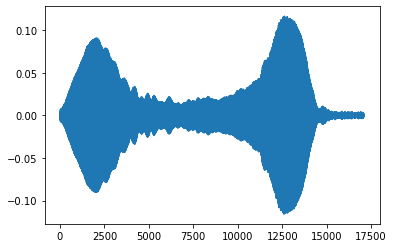

In [23]:
# grab the first syllable
plt.plot(data[int(results['onsets'][0]*rate):int(results['offsets'][0]*rate)])

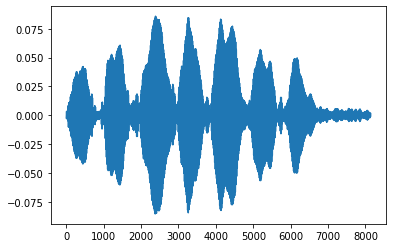

In [24]:
# grab the last syllable
plt.plot(data[int(results['onsets'][-1]*rate):int(results['offsets'][-1]*rate)])